In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Oct  4 01:41:05 2023

@author: D. Garro-Cataño
"""
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

from scipy.signal import find_peaks

from scipy.interpolate import UnivariateSpline
def FWHM(x,Int):
    HalfMax=(np.max(Int)-Int[0])/2 #Half Maximum of the peak
    HalfMaxwithBackg=HalfMax+Int[0]
    print("Half Max =", HalfMaxwithBackg)
    spline = UnivariateSpline(x, Int-HalfMaxwithBackg, s=0)
    r1, r2 = spline.roots() # find the roots
    Width=r2-r1
    print("FWHM=", Width)
    return Width

from scipy.integrate import trapz
def SinglePeakAnaly(peak,x,y,startleft,endright):
        # substract the background, or the "floor" from the intensity of the spectrum; set 0 as the beginning of the peak

        # Define the range around each peak (adjust the range as needed)
        start_index = round(max(0, peak - startleft))
        end_index = round(min(len(x), peak + endright))
        #print(start_index,end_index,startleft,endright)
        peakx=x[start_index:end_index]
        peaky=y[start_index:end_index]
        """
        # Access the data for a specific peak (for example, the first peak)
        first_peak_data = peak_data[peaks[0]]

        # Plot the extracted region around the first peak
        plt.plot(first_peak_data['x'], first_peak_data['y'], label='Peak {} region'.format(peak))
        plt.legend()
        plt.show()
        """
        # Plot the extracted region around the first peak
        plt.figure(peak)
        plt.plot(peakx,peaky,"-*", label='Peak {} region'.format(round(x[peak])))
        plt.legend()
        plt.show()

        """
        ####### let's now define the peak region with 3*sigma to the left and 3*sigma to the right #########
        a=FWHM(peakx,peaky)
        #FWHM=a
        # Define the range around each peak (adjust the range as needed)
        x=np.array([1,2,3])
        print(np.where(x == 2)[0][0])
        start_index = max(0, np.where(x == (x[peak] - 3*a/2))[0][0])
        end_index = min(len(x), np.where(x == (x[peak] + 3*a/2))[0][0])
        # Store the data for each peak in a dictionary (optional)
        #peak_data[peak] = {'x': x[start_index:end_index], 'y': y[start_index:end_index]}
        peakx=x[start_index:end_index]
        peaky=y[start_index:end_index]
        """
        """
        # Access the data for a specific peak (for example, the first peak)
        first_peak_data = peak_data[peaks[0]]

        # Plot the extracted region around the first peak
        plt.plot(first_peak_data['x'], first_peak_data['y'], label='Peak {} region'.format(peak))
        plt.legend()
        plt.show()
        """
        """
        # Plot the extracted region around the first peak
        plt.plot(peakx,peaky, label='Peak {} region'.format(round(x[peak])))
        plt.legend()
        plt.show()
        """

        ##### Calculate Area and Gain Factor #####
        PeakArea = trapz(peaky, x=peakx)
        return PeakArea


def Peakfinder(frecuencia, intensidad,h,name):
    #fig, ax=plt.subplots(1,1, figsize=(20,15)) #for the individual peaks
    frecuencia=np.array(frecuencia)
    intensidad=np.array(intensidad)
    # Encuentra picos en el espectro de intensidad
    picos, _ = find_peaks(intensidad, height=h,prominence=0.01)  # Ajusta el valor de "height" según tu espectro
    # picos is the peak INDEX

    # Grafica el espectro de intensidad y resalta los picos
    plt.figure(1,figsize=(10, 6))
    plt.plot(frecuencia, intensidad,label="{}".format(name))
    plt.plot(frecuencia[picos], intensidad[picos], 'k0')  # Peak markers, descomentada
    #plt.xlabel(r'2$\theta$ (°)')
    plt.xlabel('x')
    plt.ylabel('Intensidad (u.a.)')
    #plt.title('Espectro de Intensidad con Picos')
    plt.grid(True)
    plt.legend()
    #plt.savefig("DRX")
    #plt.savefig("DRX_{}".format(name))
    plt.show()


    # Imprime las frecuencias de los picos
    frecuencias_picos = frecuencia[picos]
    #maxint=max(intensidad[picos])
    #ind=list(intensidad).index(maxint)
    print("Peaks of {}:".format(name), frecuencia[picos]) #frecuencia[picos]
    # to get eV: 1*10**7* 0.00012398/frecuencia[picos]
    # to get k: 1*10**7/frecuencia[picos]

    # Extract a region around each peak
    peaks=picos #peaks indexes #better in english
    x=frecuencia
    y=intensidad
    peak_data = {}
    ranges = 20*np.ones((len(peaks), 2))

    #### for Absorbance_Biop ####
    #ranges[0][0]=ranges[0][0]+9
    #ranges[0][1]=ranges[0][1]-9
    #ranges[1][0]=ranges[0][0]+1
    #ranges[1][1]=ranges[0][1]+13


    #### for Emission_Alv Vis ####
    ranges[1][0]=ranges[1][0]+640
    ranges[1][1]=ranges[2][1]+370
    ranges[2][0]=ranges[2][0]+130
    ranges[2][1]=ranges[2][1]+255
    ranges[3][0]=ranges[3][0]+290
    ranges[3][1]=ranges[3][1]+140
    ranges[4][0]=ranges[4][0]+190
    ranges[4][1]=ranges[4][1]+200
    ranges[5][0]=ranges[5][0]+120
    ranges[5][1]=ranges[5][1]+380


    #PeakAreas=np.zeros(len(peaks))
    PeakAreas=[]
    for peak,range in zip(peaks,ranges):
      PeakArea=SinglePeakAnaly(peak,x,y,range[0],range[1])
      print("peak", x[peak], "nm Area:",PeakArea)
      PeakAreas.append(PeakArea)
    return PeakAreas


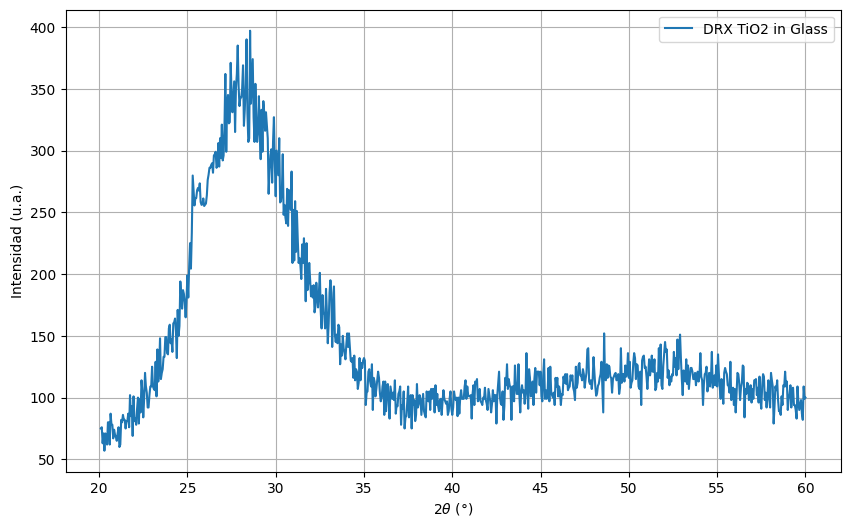

Peaks of DRX TiO2 in Glass: [25.15 25.3  25.6  25.7  25.9  26.4  26.6  26.75 26.85 26.95 27.15 27.3
 27.45 27.65 27.85 28.15 28.35 28.55 28.7  28.85 29.05 29.2  29.3  29.45
 29.75 29.9  30.05 30.2  30.4  30.5  30.65 30.75 30.9  31.   31.1  31.2
 31.35 31.5  31.6  31.75 31.9  32.5 ]


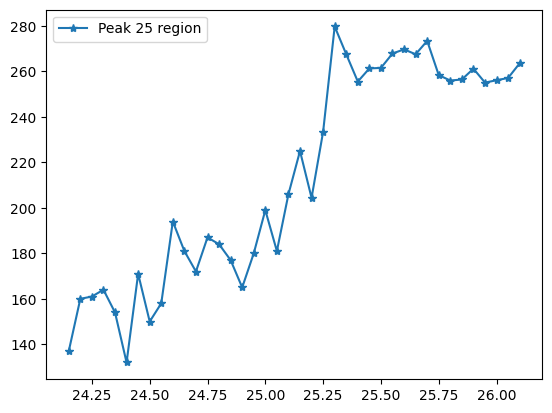

peak 25.15 nm Area: 417.20206564799133


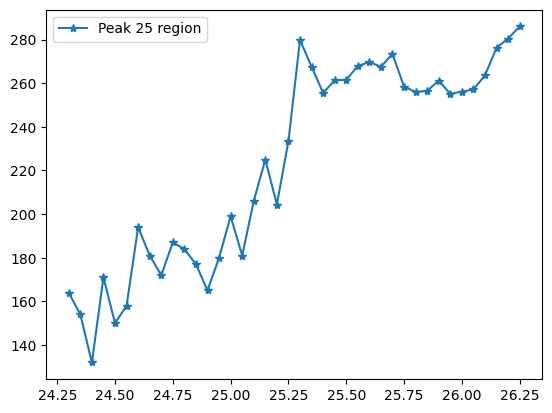

peak 25.3 nm Area: 435.2038907753252


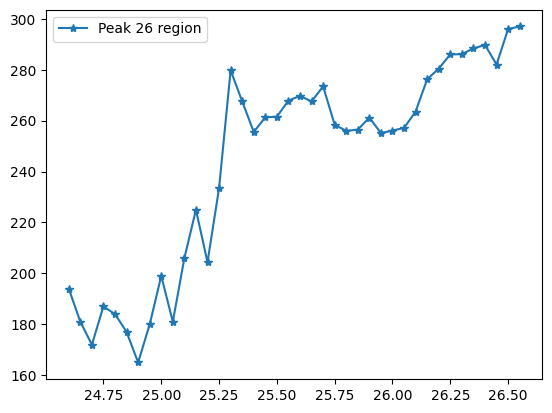

peak 25.6 nm Area: 474.6937323146573


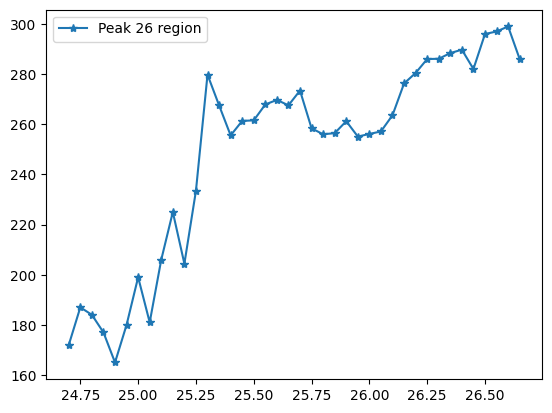

peak 25.7 nm Area: 486.0187323146571


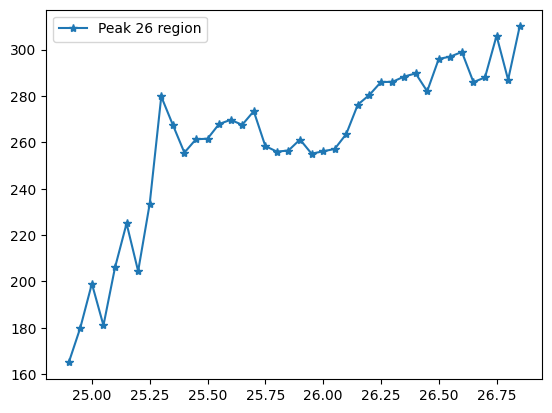

peak 25.9 nm Area: 509.143732314658


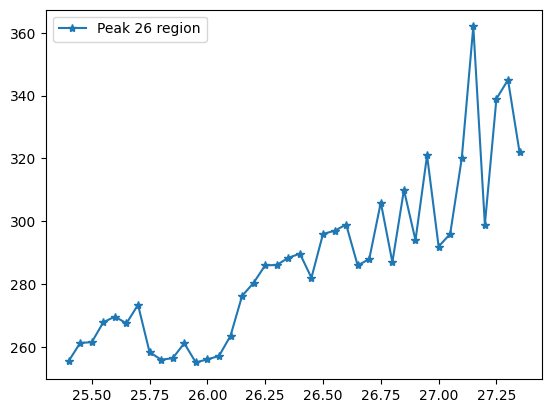

peak 26.4 nm Area: 559.0182654216192


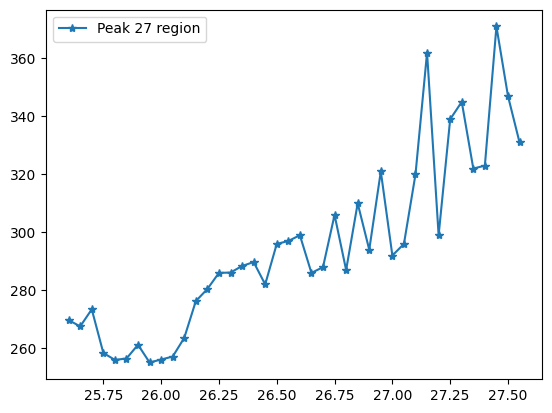

peak 26.6 nm Area: 574.7220713073002


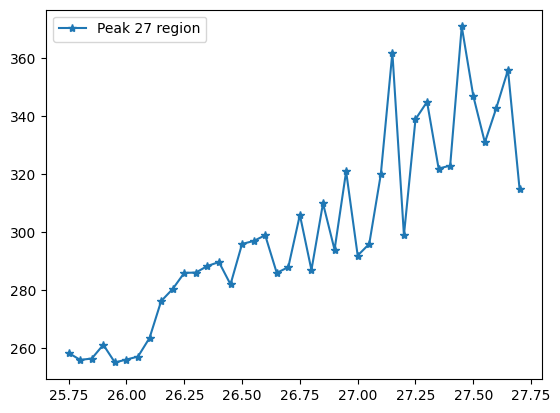

peak 26.75 nm Area: 585.5695246179962


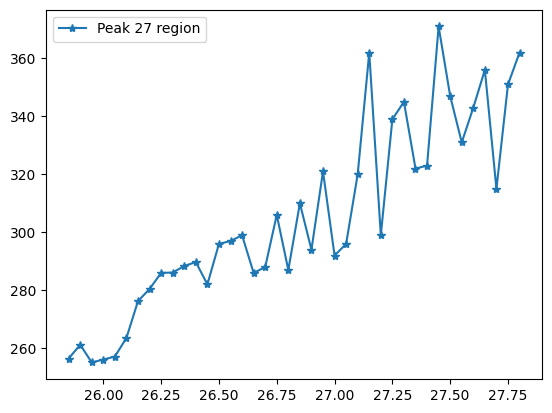

peak 26.85 nm Area: 594.3731324278434


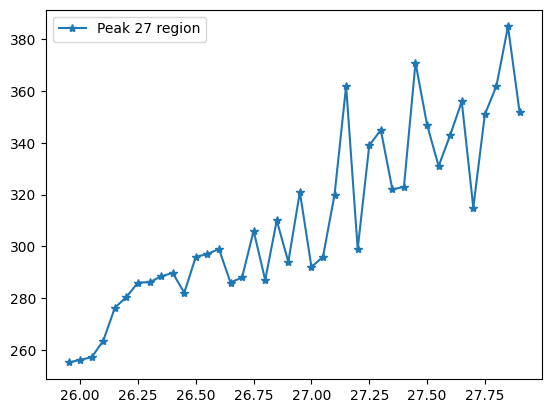

peak 26.95 nm Area: 605.6228211658172


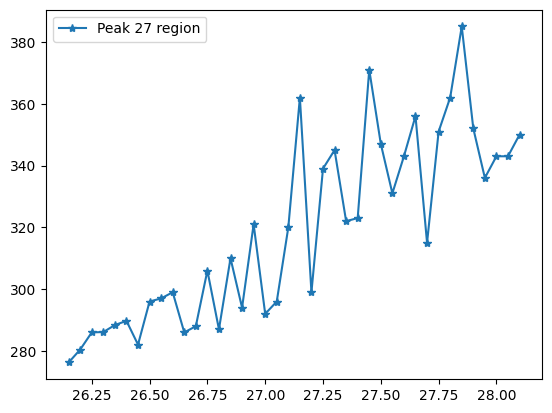

peak 27.15 nm Area: 622.1449207696669


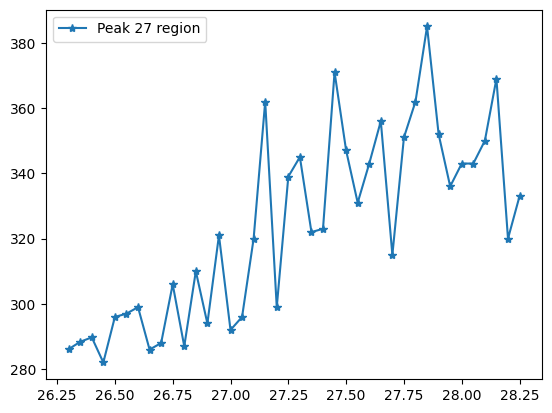

peak 27.3 nm Area: 631.2866440294281


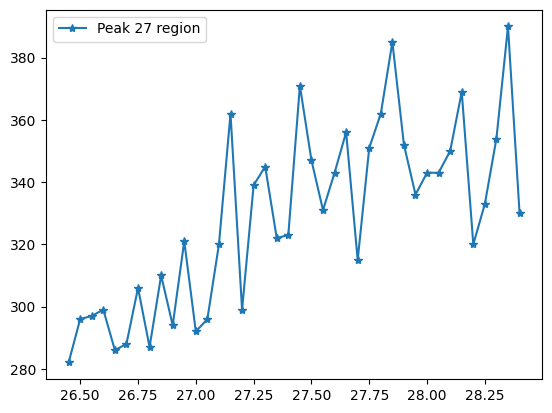

peak 27.45 nm Area: 641.9511460101864


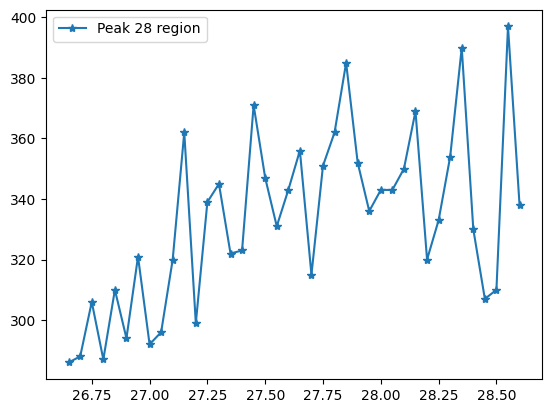

peak 27.65 nm Area: 650.5500000000006


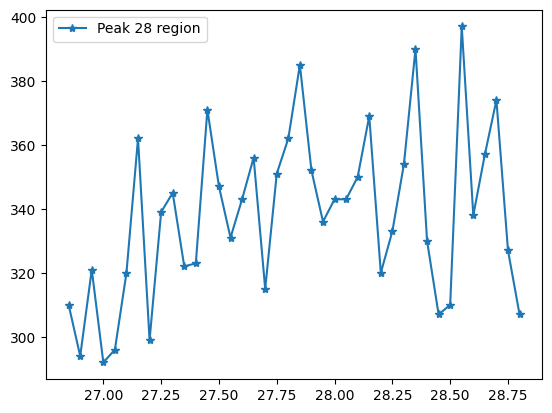

peak 27.85 nm Area: 660.6249999999995


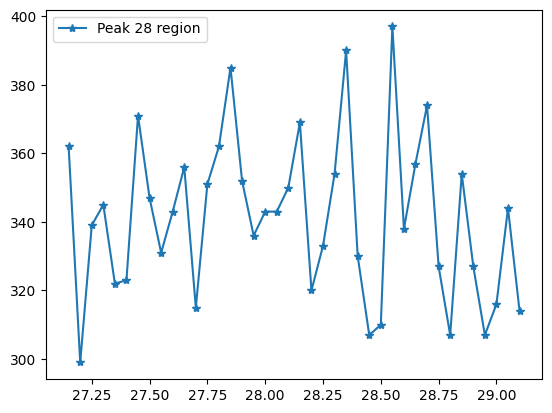

peak 28.15 nm Area: 665.6000000000009


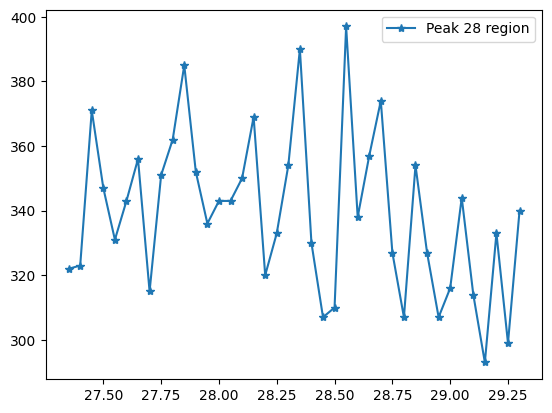

peak 28.35 nm Area: 661.9499999999997


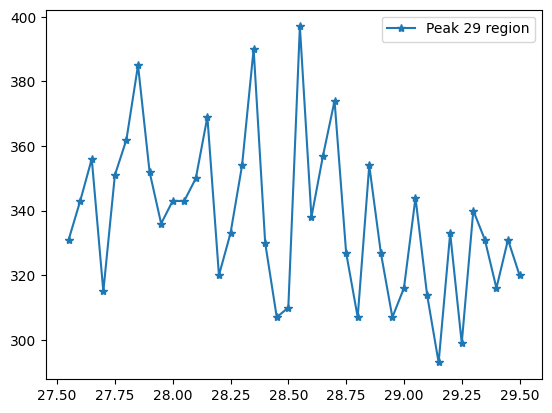

peak 28.55 nm Area: 658.9749999999995


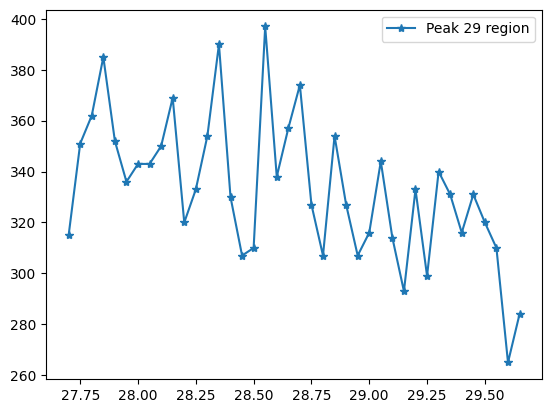

peak 28.7 nm Area: 651.7249999999997


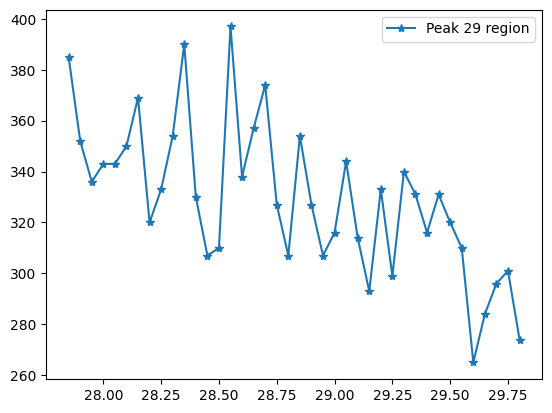

peak 28.85 nm Area: 642.3749999999997


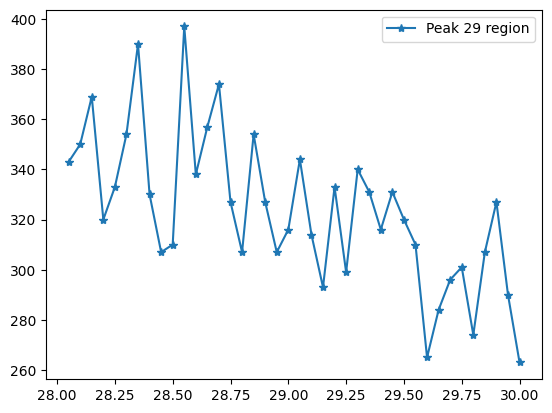

peak 29.05 nm Area: 632.2499999999997


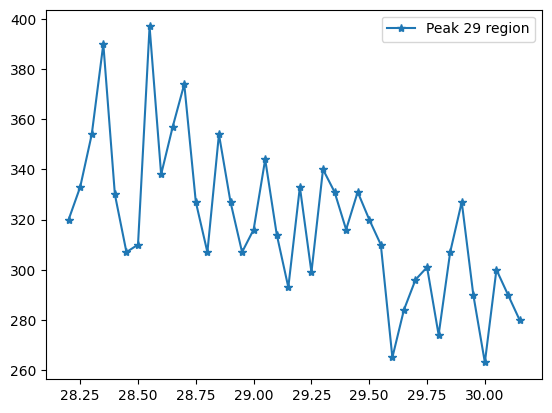

peak 29.2 nm Area: 622.7999999999997


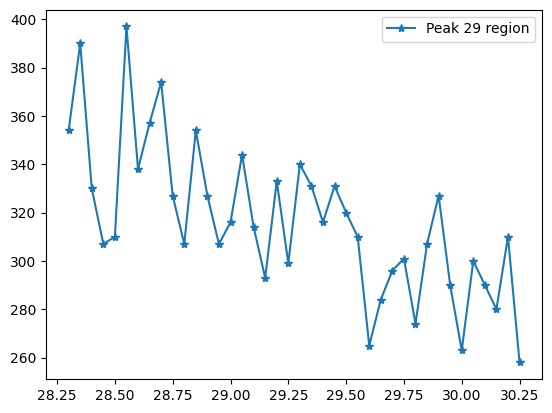

peak 29.3 nm Area: 618.2499999999995


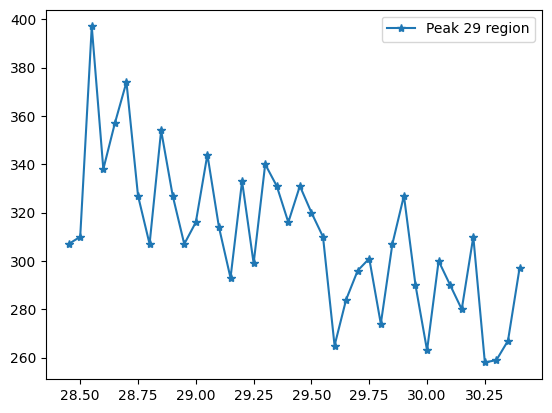

peak 29.45 nm Area: 605.8999999999999


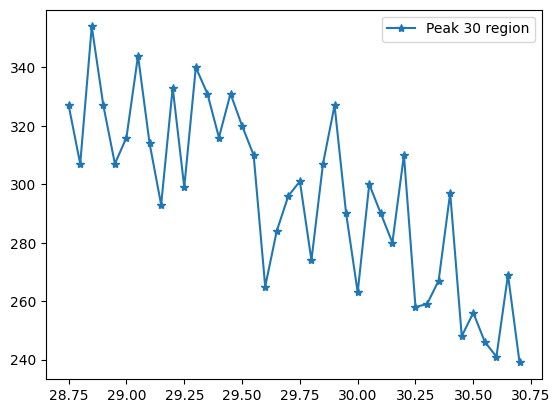

peak 29.75 nm Area: 577.6499999999997


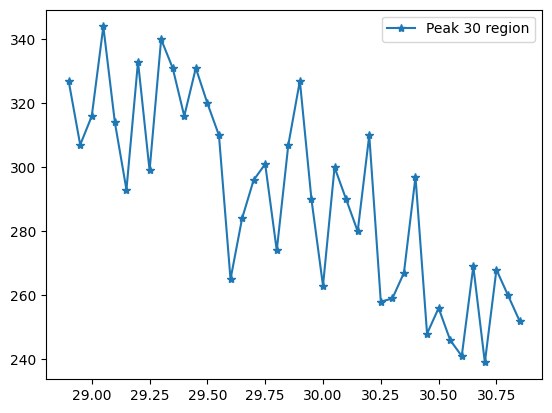

peak 29.9 nm Area: 566.9250000000009


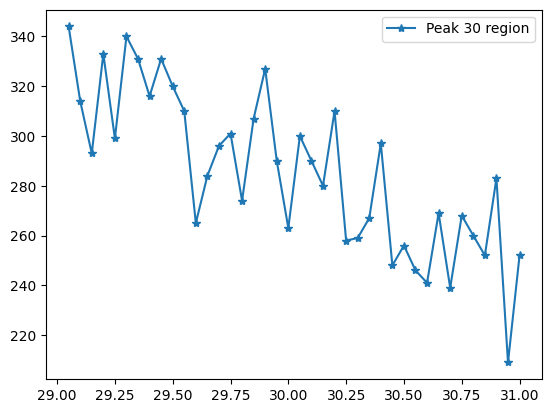

peak 30.05 nm Area: 556.1999999999997


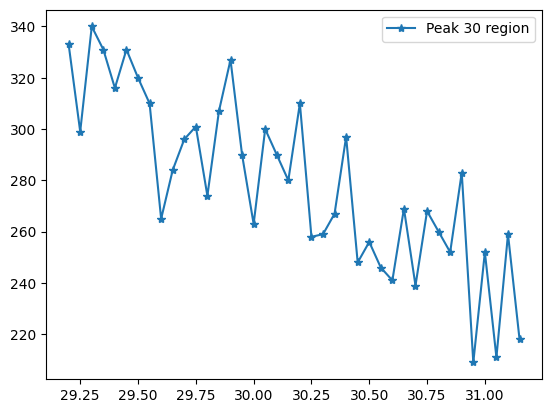

peak 30.2 nm Area: 544.1749999999997


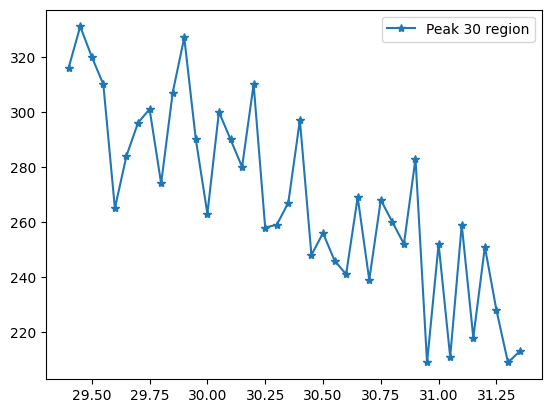

peak 30.4 nm Area: 524.6250000000007


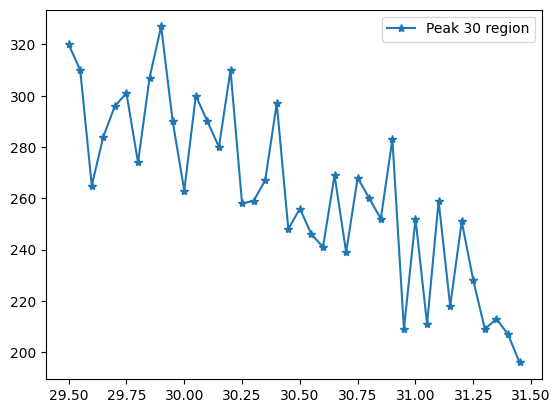

peak 30.5 nm Area: 512.7499999999998


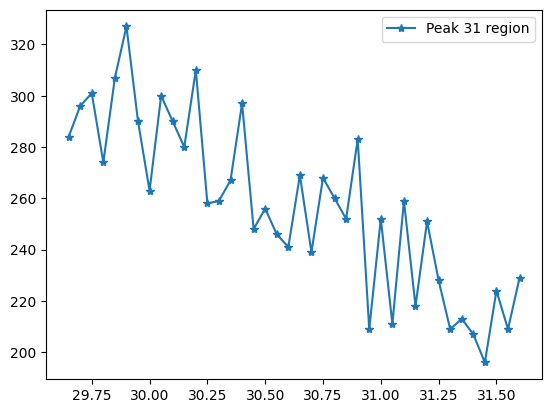

peak 30.65 nm Area: 501.1750000000006


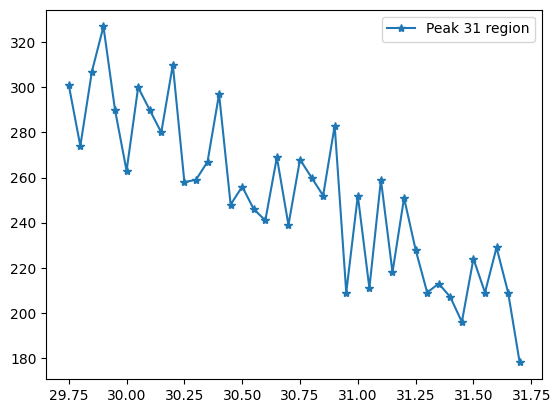

peak 30.75 nm Area: 492.37499999999966


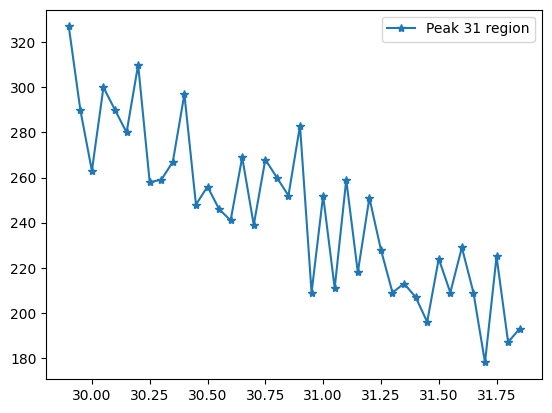

peak 30.9 nm Area: 477.5000000000005


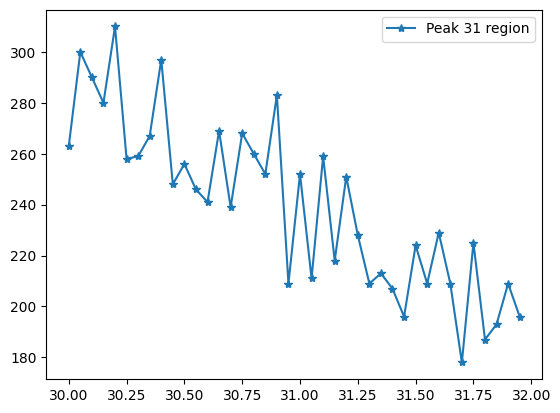

peak 31.0 nm Area: 468.4249999999997


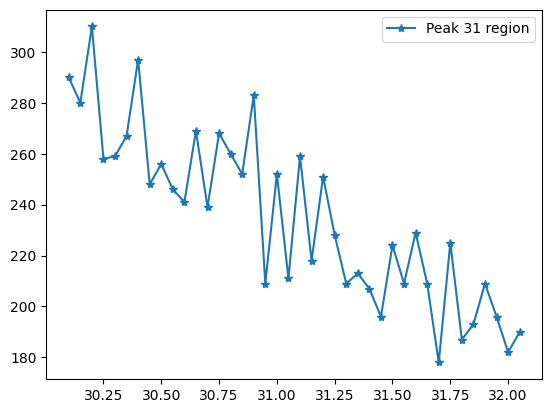

peak 31.1 nm Area: 458.3499999999989


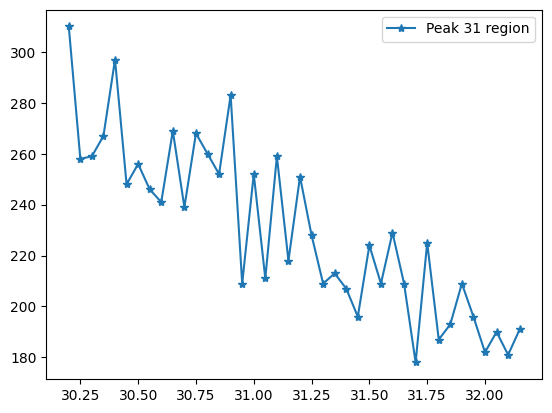

peak 31.2 nm Area: 447.92499999999984


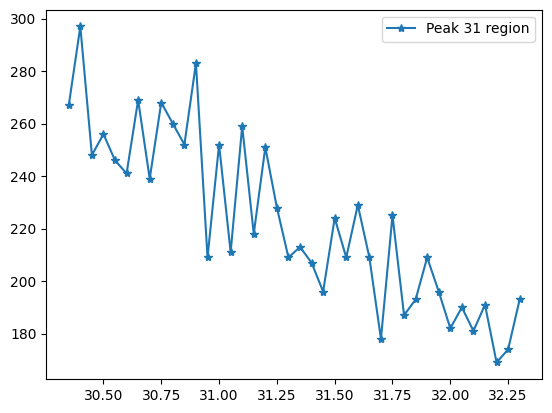

peak 31.35 nm Area: 434.3999999999991


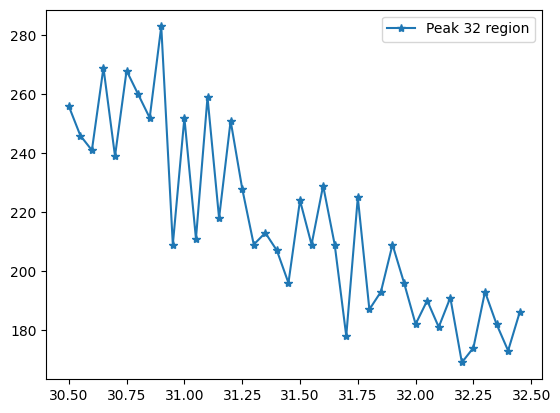

peak 31.5 nm Area: 421.30000000000047


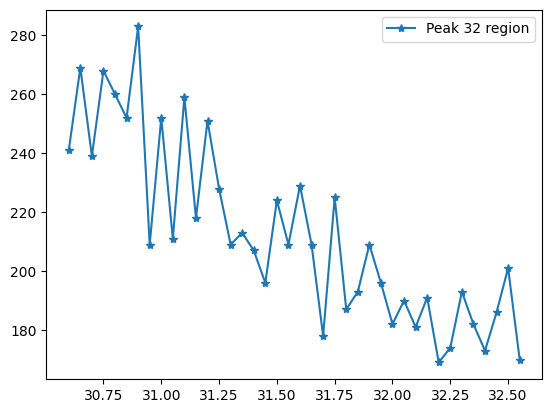

peak 31.6 nm Area: 415.524999999999


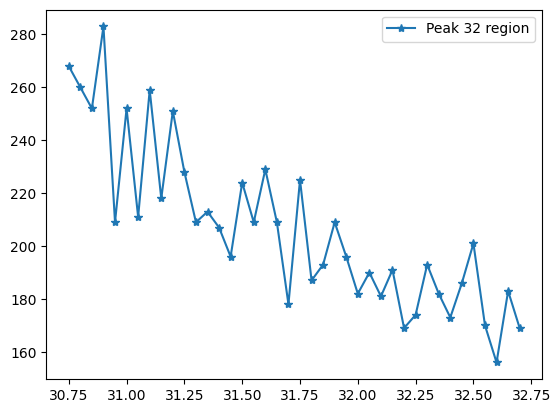

peak 31.75 nm Area: 402.8250000000003


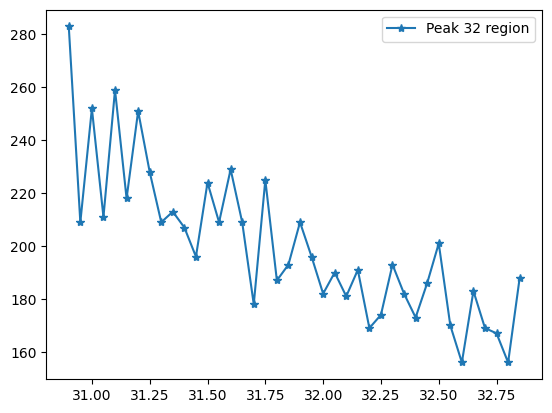

peak 31.9 nm Area: 388.52500000000043


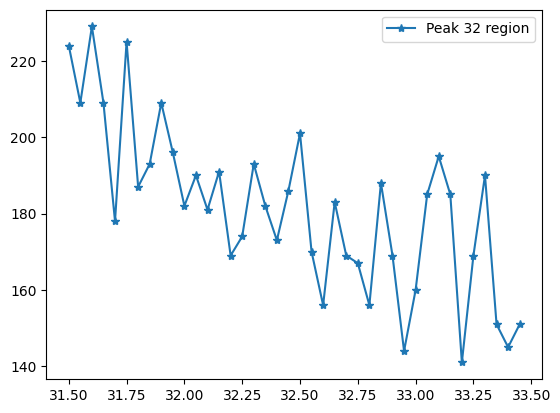

peak 32.5 nm Area: 353.37500000000045


[417.20206564799133,
 435.2038907753252,
 474.6937323146573,
 486.0187323146571,
 509.143732314658,
 559.0182654216192,
 574.7220713073002,
 585.5695246179962,
 594.3731324278434,
 605.6228211658172,
 622.1449207696669,
 631.2866440294281,
 641.9511460101864,
 650.5500000000006,
 660.6249999999995,
 665.6000000000009,
 661.9499999999997,
 658.9749999999995,
 651.7249999999997,
 642.3749999999997,
 632.2499999999997,
 622.7999999999997,
 618.2499999999995,
 605.8999999999999,
 577.6499999999997,
 566.9250000000009,
 556.1999999999997,
 544.1749999999997,
 524.6250000000007,
 512.7499999999998,
 501.1750000000006,
 492.37499999999966,
 477.5000000000005,
 468.4249999999997,
 458.3499999999989,
 447.92499999999984,
 434.3999999999991,
 421.30000000000047,
 415.524999999999,
 402.8250000000003,
 388.52500000000043,
 353.37500000000045]

In [ ]:
df = pd.read_excel('DRXglassTiO2.xls')
startrow=0
endrow=1100
theta1=np.array(df.iloc[startrow:endrow,0])
inten1=np.array(df.iloc[startrow:endrow,1])
theta2=np.array(df.iloc[startrow:endrow,2])
inten2=np.array(df.iloc[startrow:endrow,3])
Peakfinder(theta1, inten1,200,"DRX TiO2 in Glass")
#Peakfinder(theta2, inten2,200,"DRX_TiO2Alone")

#Absorbance

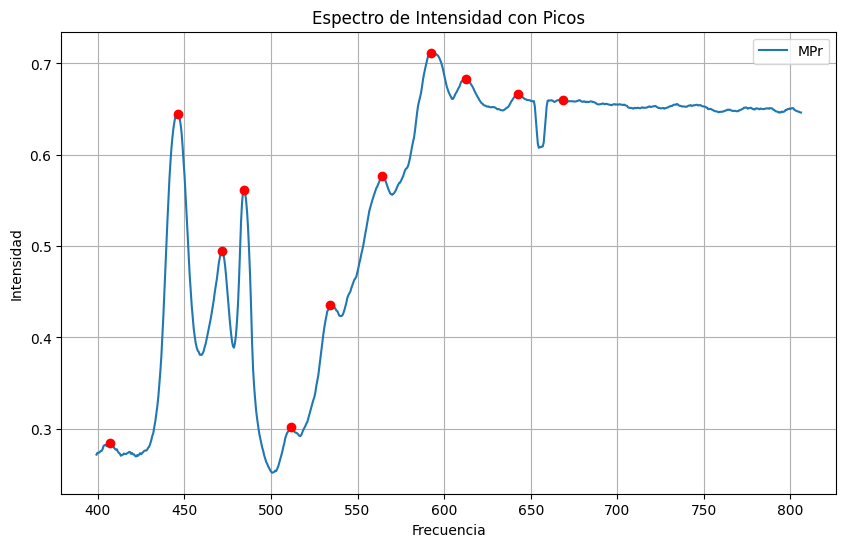

Peaks of MPr: [406.8728942871094 446.04046630859375 471.6719055175781 484.460205078125
 511.718505859375 534.27197265625 564.2496337890625 592.398193359375
 612.4442138671875 642.7025146484375 668.8681640625]
0 33 20.0 20.0


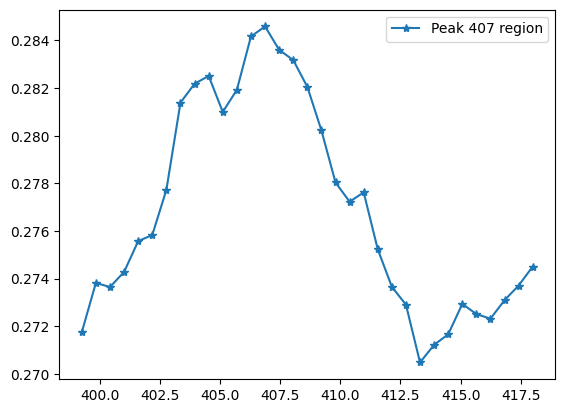

60 100 20.0 20.0


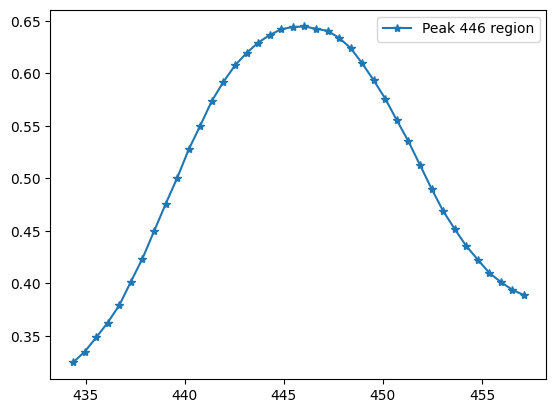

104 144 20.0 20.0


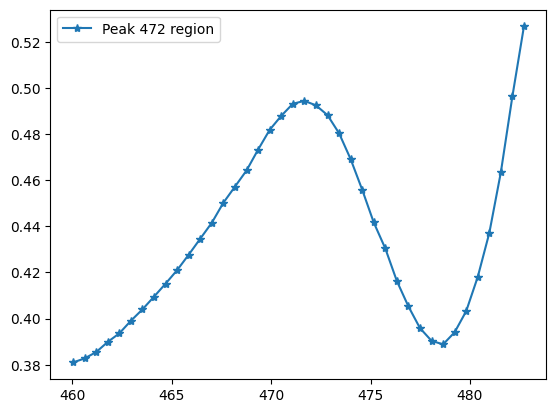

126 166 20.0 20.0


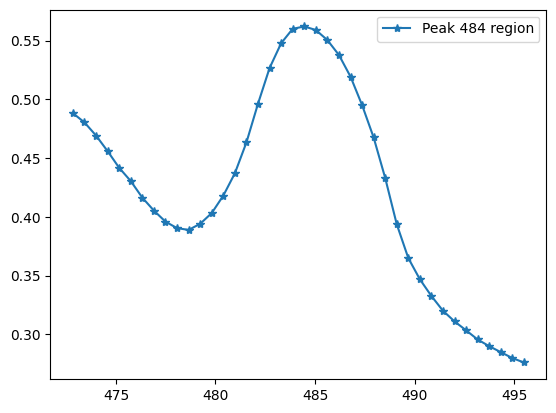

173 213 20.0 20.0


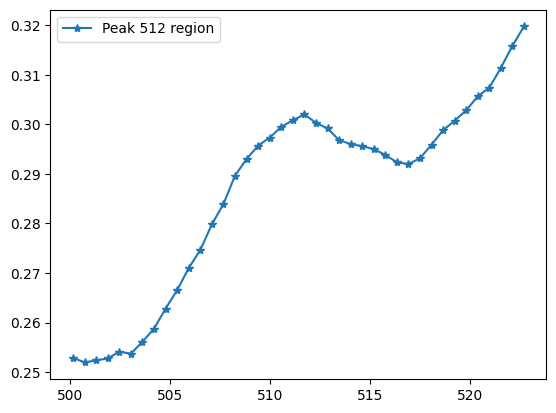

212 252 20.0 20.0


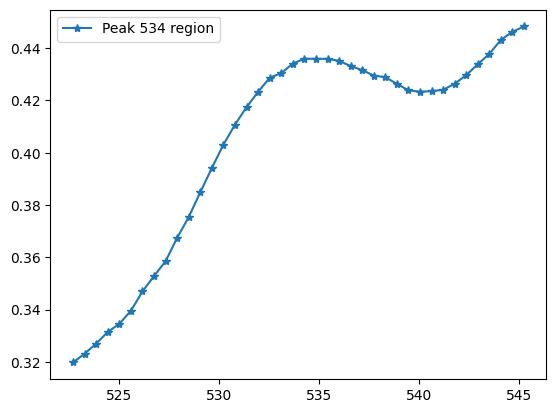

264 304 20.0 20.0


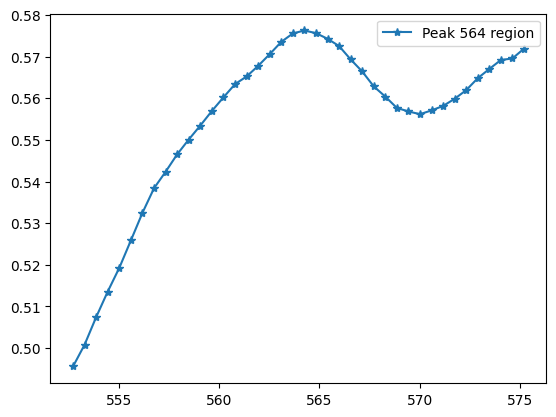

313 353 20.0 20.0


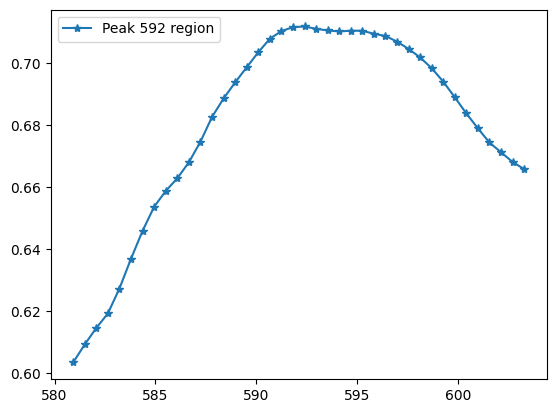

348 388 20.0 20.0


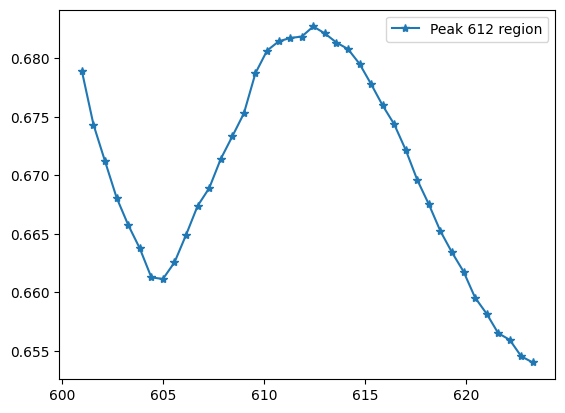

401 441 20.0 20.0


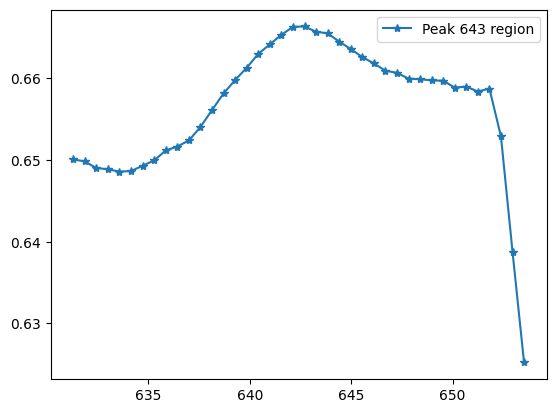

447 487 20.0 20.0


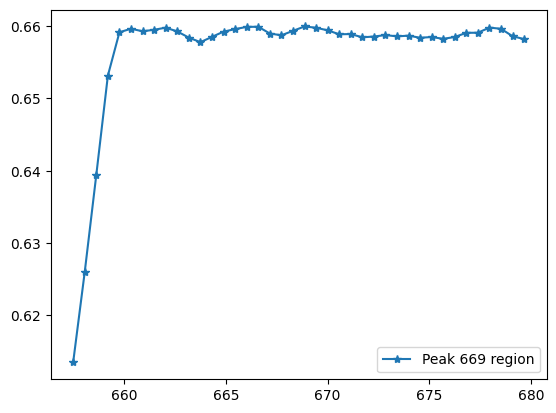

'\n#Peakfinder(wl, -np.log10(M_Pr0),-0.5,"AgCurved_V")\n#Peakfinder(wl, -np.log10(M_Pr1),-0.5,"AgCurved_V")\n#Peakfinder(wl, -np.log10(M_Pr2),-0.5,"AgCurved_V")\nPeakfinder(wl, -np.log10(M_Pr_Tio2),-1.6,"MPrTiO2")\nPeakfinder(wl, -np.log10(M_Pr_Tio2_R),-1.6,"MPrTiO2R")\nPeakfinder(wl, -np.log10(Tio2),-1.6,"MTiO2")\n#Peakfinder(wl, -np.log10(Tio2_R),-0.5,"AgCurved_V")\n'

In [ ]:
df = pd.read_excel('TransmPrTiO2.xlsx')

#print(df)

#for i in range(len(df.columns)):
#    coli=df.iloc[5:,i]


##### Acording to file order, name the columns
startrow=388#388#219
endrow=1100#1457

wl=np.array(df.iloc[startrow:endrow,0])

Ag=np.array(df.iloc[startrow:endrow,1])
Ag2=np.array(df.iloc[startrow:endrow,2])

Ag45=np.array(df.iloc[startrow:endrow,3] )
Ag45_H=np.array(df.iloc[startrow:endrow,4] )
Ag45_V=np.array(df.iloc[startrow:endrow,5] )


AgCurved=np.array(df.iloc[startrow:endrow,6] )
AgCurved_H=np.array(df.iloc[startrow:endrow,7] )
AgCurved_V=np.array(df.iloc[startrow:endrow,8] )

Ag_H=np.array(df.iloc[startrow:,9] )
Ag_HV_H=np.array(df.iloc[startrow:,10] )
Ag_V=np.array(df.iloc[startrow:,11] )



### Rare Earths ####
M=np.array(df.iloc[startrow:endrow,12] )
M_Pr0=np.array(df.iloc[startrow:endrow,13])
M_Pr2=np.array(df.iloc[startrow:endrow,14] )
M_Pr1=np.array(df.iloc[startrow:endrow,15]) #repeticion
M_Pr=np.array(df.iloc[startrow:endrow,20]) #repeticion

M_Pr_Tio2=np.array(df.iloc[startrow:endrow,16]) #repeticion
M_Pr_Tio2_R=np.array(df.iloc[startrow:endrow,17] )#repeticion
Tio2=np.array(df.iloc[startrow:endrow,18]) #repeticion
Tio2_R=np.array(df.iloc[startrow:endrow,19]) #repeticion

#Peakfinder(wl, -np.log10(Ag),-1.5,"Ag")
#Peakfinder(wl, -np.log10(AgCurved),-0.5,"AgCurved")
#Peakfinder(wl, -np.log10(AgCurved_H),-0.5,"AgCurved_H")
#Peakfinder(wl, -np.log10(AgCurved_V),-0.5,"AgCurved_V")

#print(M_Pr-M)
#Peakfinder(wl, -np.log10(M),-0.5,"M")
Peakfinder(wl, -np.log10(abs(M_Pr))+np.log10(M),-1.6,"MPr")
"""
#Peakfinder(wl, -np.log10(M_Pr0),-0.5,"AgCurved_V")
#Peakfinder(wl, -np.log10(M_Pr1),-0.5,"AgCurved_V")
#Peakfinder(wl, -np.log10(M_Pr2),-0.5,"AgCurved_V")
Peakfinder(wl, -np.log10(M_Pr_Tio2),-1.6,"MPrTiO2")
Peakfinder(wl, -np.log10(M_Pr_Tio2_R),-1.6,"MPrTiO2R")
Peakfinder(wl, -np.log10(Tio2),-1.6,"MTiO2")
#Peakfinder(wl, -np.log10(Tio2_R),-0.5,"AgCurved_V")
"""


#Emission vis

In [ ]:
df2 = pd.read_excel('EmisPr05ti01sni8.xls')
df3 = pd.read_excel('EmisPr05ti005 vis.xls')

df2=df2.T.drop_duplicates().T
df3=df3.T.drop_duplicates().T
cols=['wl', "Pr", "PrNp"]
df2.columns=cols
df3.columns=cols

df2.head()

,wl,Pr,PrNp
0,779.930188,169067.0,169353.0
1,780.210678,169132.0,169486.0
2,780.491159,169176.0,169578.0
3,780.771632,169983.0,169617.0
4,781.052096,169289.0,169604.0


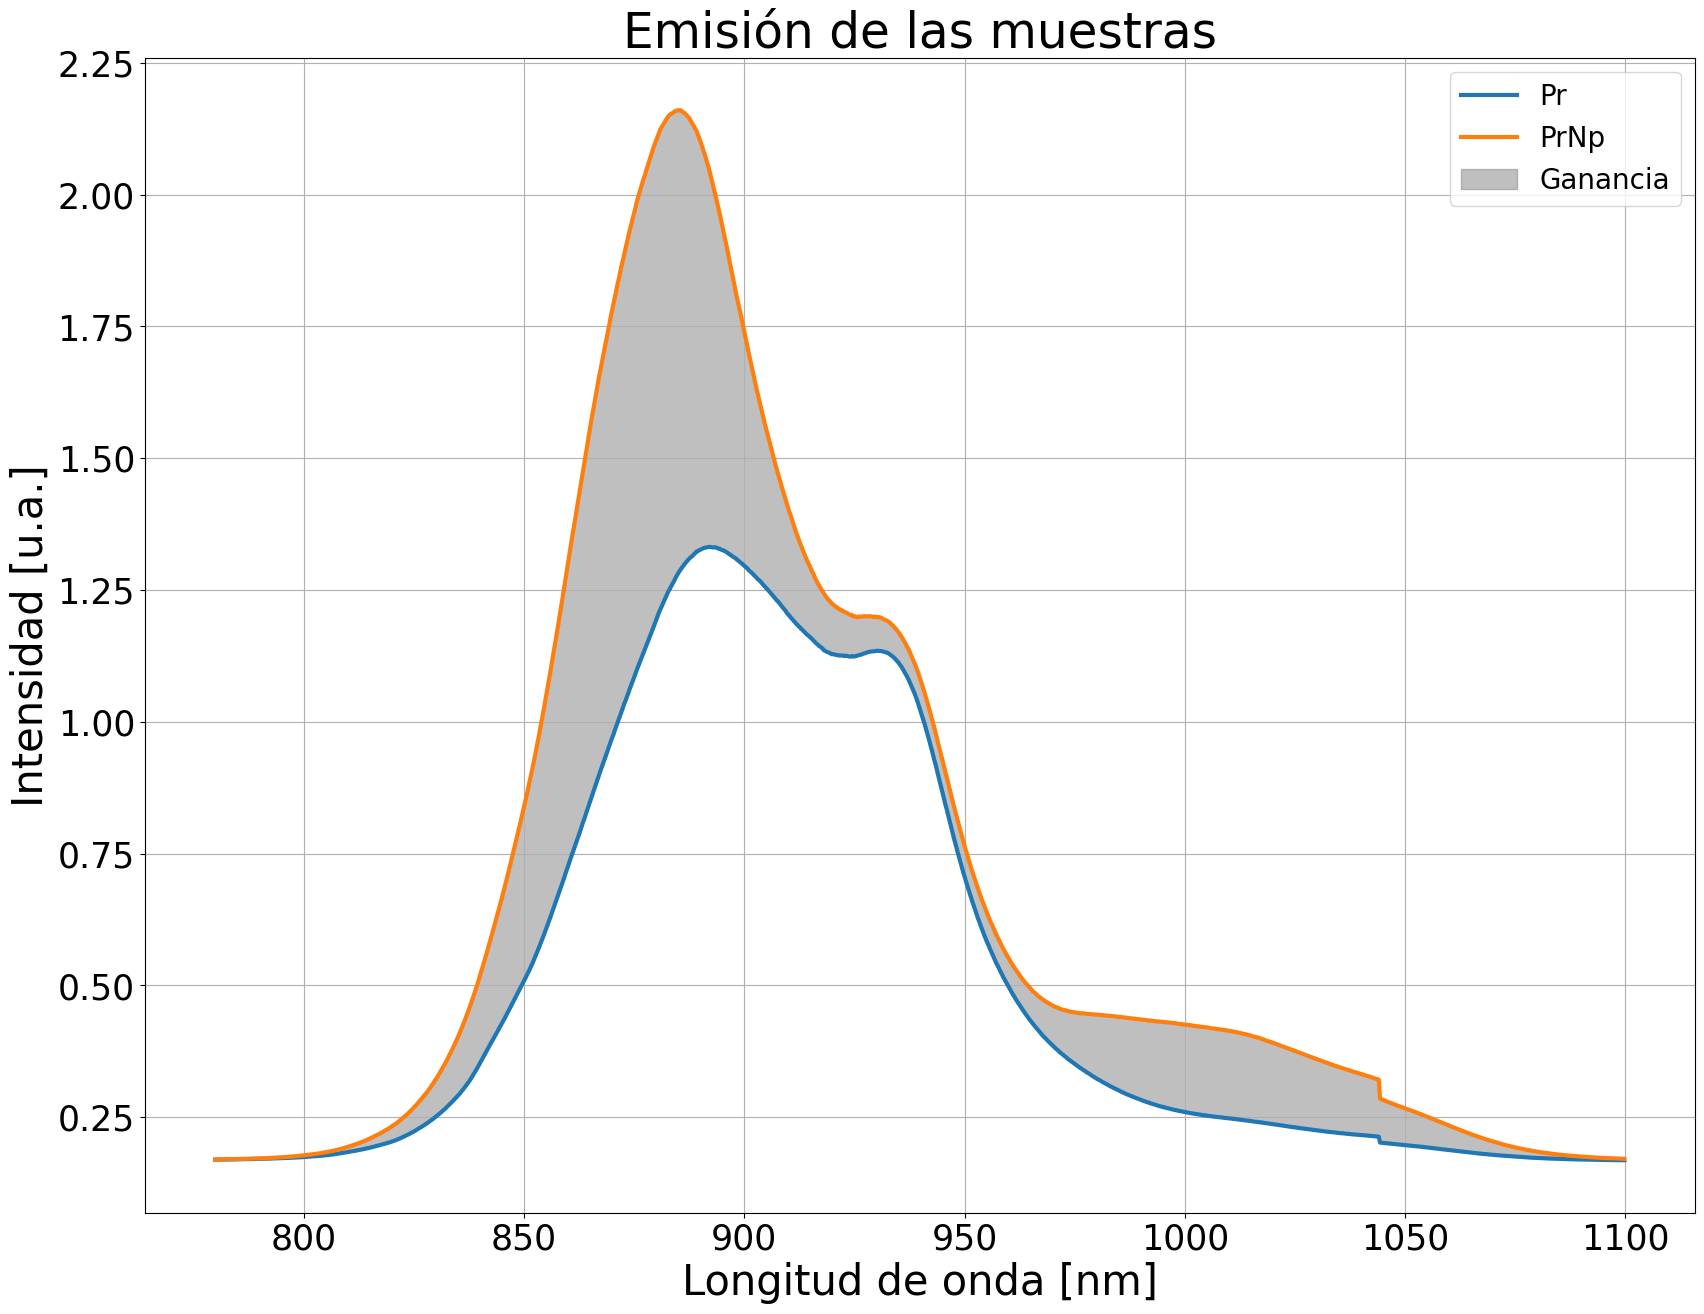

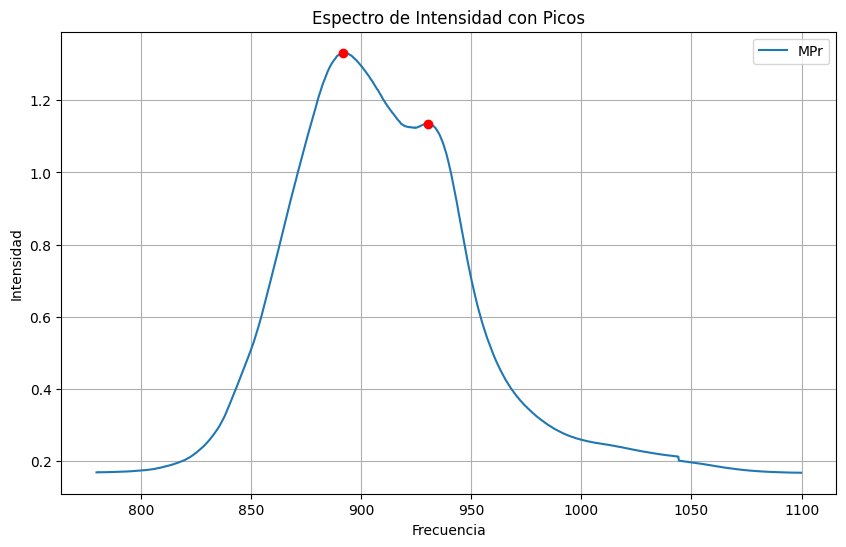

Peaks of MPr: [891.92665072 930.25249165]


IndexError: ignored

In [ ]:
#df2=pd.read_csv("data/emision1.csv")
#df3=pd.read_csv("data/emision2.csv")

df2 = pd.read_excel('EmisPr05ti01sni8.xls')
df3 = pd.read_excel('EmisPr05ti005 vis.xls')

df2=df2.T.drop_duplicates().T
df3=df3.T.drop_duplicates().T
cols=['wl', "Pr", "PrNp"]
df2.columns=cols
df3.columns=cols

#df2.describe()
df2['Pr']=df2['Pr']*1e-6
df2['PrNp']=df2['PrNp']*1e-6

df3['Pr']=df3['Pr']*1e-6
df3['PrNp']=df3['PrNp']*1e-6

fig, ax=plt.subplots(1,1, figsize=(20,15))

for i in range(1,3):
    ax.plot(df2.iloc[:,0], df2.iloc[:,i], lw=3, label=df2.columns[i])

plt.fill_between(df2.iloc[:,0], df2.iloc[:,1], df2.iloc[:,2], where=(df2.iloc[:,2]> df2.iloc[:,1]), interpolate=True, alpha=0.5, color='gray', label='Ganancia')

ax.set_xlabel("Longitud de onda [nm]", fontsize=30)
ax.set_ylabel("Intensidad [u.a.]", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title("Emisión de las muestras", fontsize=35)
ax.legend(fontsize=20)
ax.grid()
plt.show()

fig.savefig("emision1.svg", dpi=300, format="svg")
#print(np.array(df2.wl))
#print(wl)
Peakfinder(np.array(df2.wl), np.array(df2.Pr),-1.6,"MPr")
Peakfinder(np.array(df2.wl), np.array(df2.PrNp),-1.6,"MPr")

In [ ]:
####### Area y factor de Ganancia ##########
import numpy as np
from scipy.integrate import trapz

# Supongamos que tienes tus datos en dos listas x_values y y_values

area1 = trapz(df2['Pr'], x=df2['wl'])
area2 = trapz(df2['PrNp'], x=df2['wl'])

print("Área bajo la curva:", area1)
print("Área bajo la curva:", area2)

print("Factor de ganancia:", area2/area1)

Área bajo la curva: 162.8663312842209
Área bajo la curva: 221.8615779871976
Factor de ganancia: 1.3622310777052076


#Emission NIR

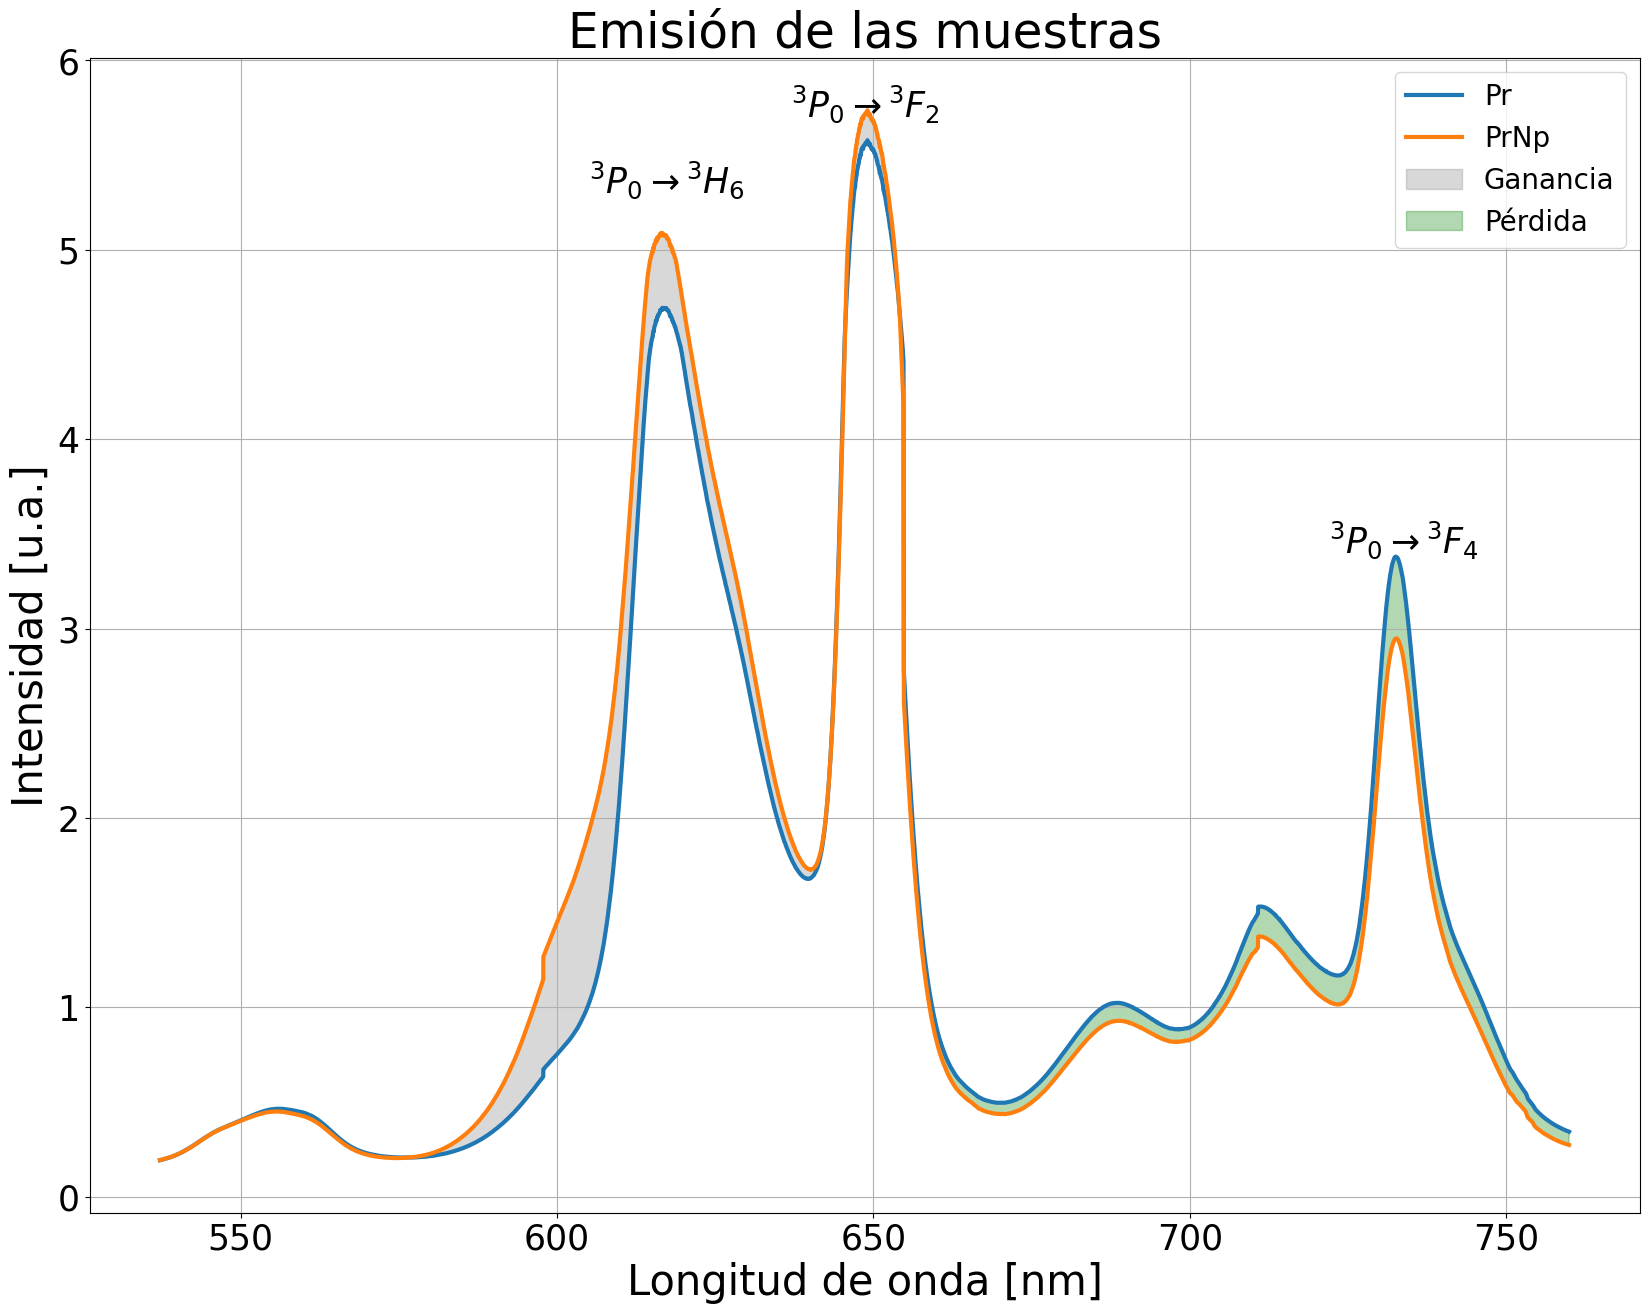

Área bajo la curva: 312.1668267066874
Área bajo la curva: 321.517893203185
Factor de ganancia: 1.0299553498209593


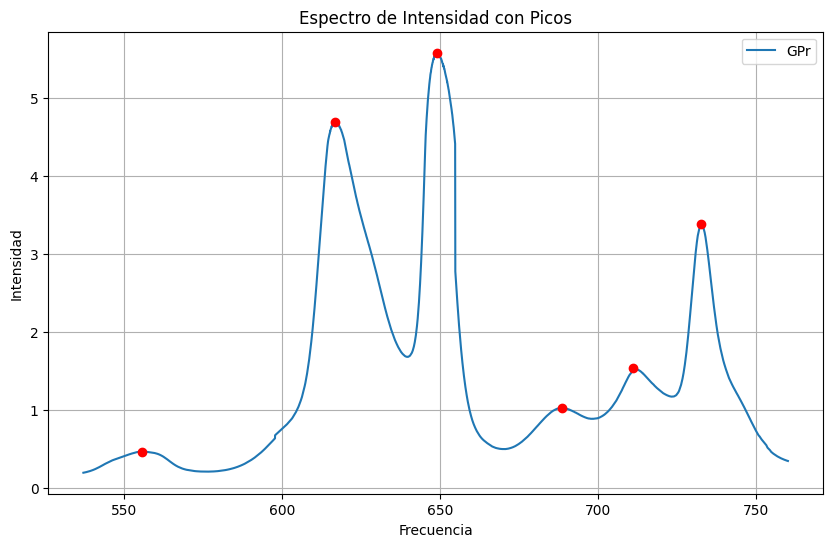

Peaks of GPr: [555.89369138 616.66028703 649.06342743 688.58759827 710.99061265
 732.57034017]


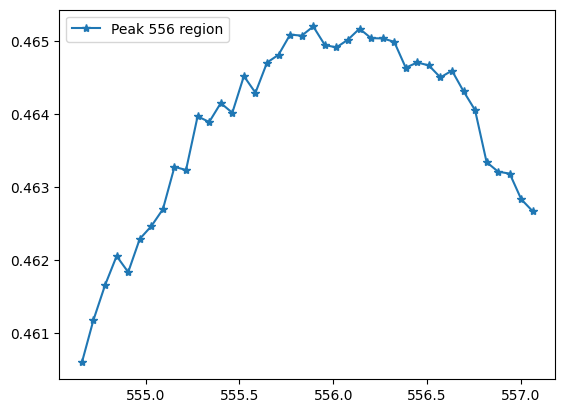

peak 555.893691383031 nm Area: 1.1148941760552875


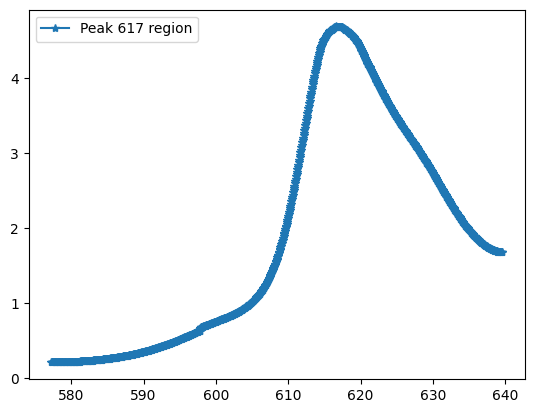

peak 616.660287033209 nm Area: 115.17852110799711


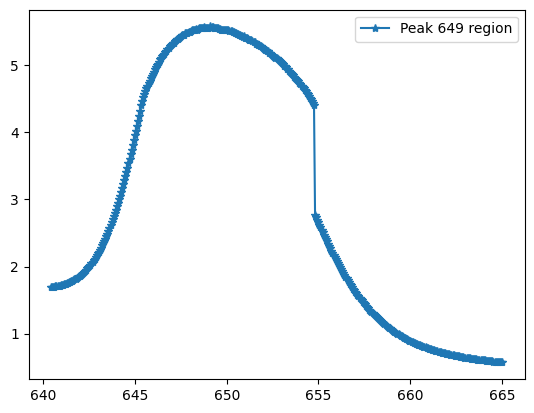

peak 649.063427428075 nm Area: 73.08353363942226


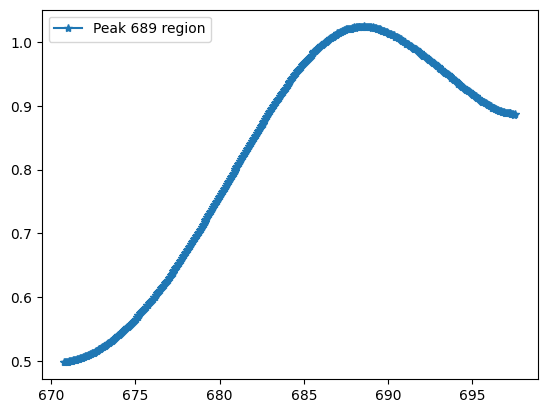

peak 688.587598270723 nm Area: 21.995563114717196


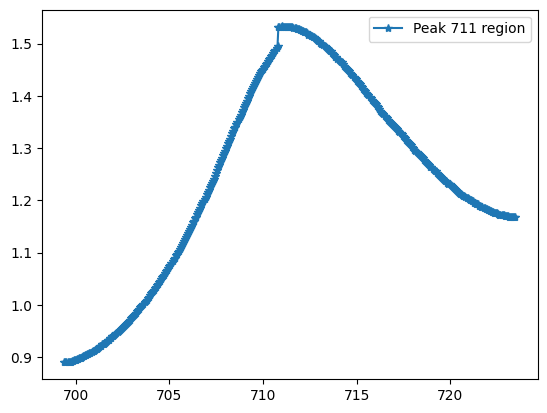

peak 710.990612647265 nm Area: 29.891616385716098


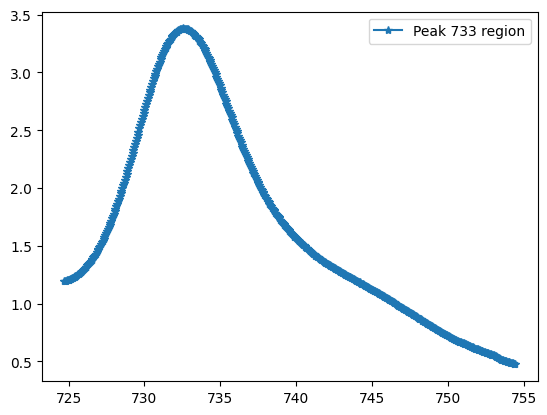

peak 732.570340169034 nm Area: 49.19787041603391


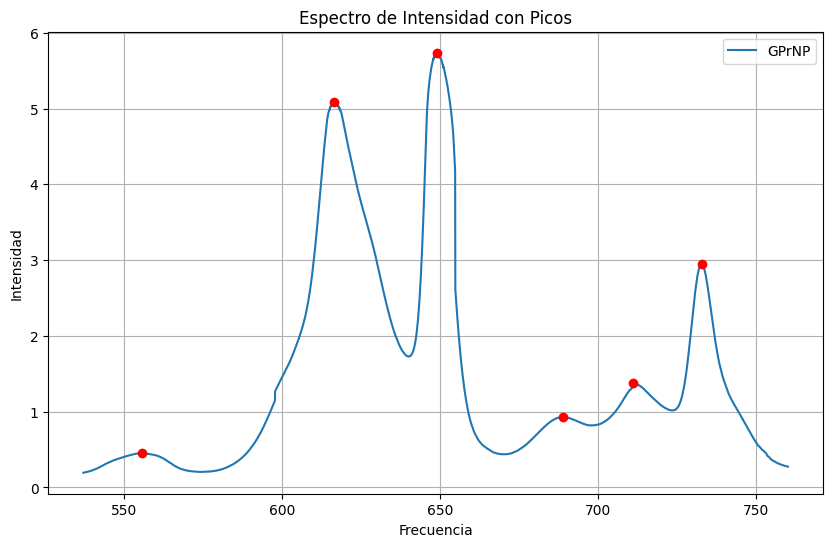

Peaks of GPrNP: [555.83206474 616.54083424 649.06342743 688.87115452 710.99061265
 732.68189421]


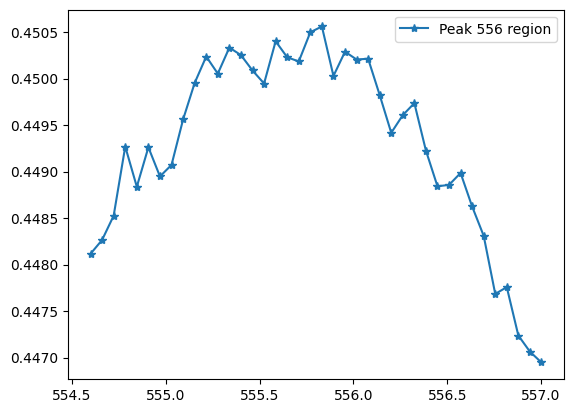

peak 555.832064736234 nm Area: 1.080007689633412


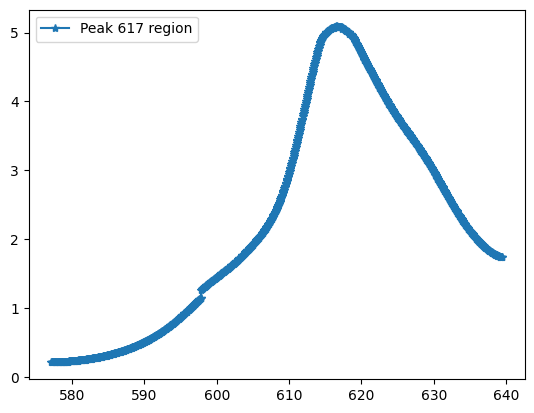

peak 616.540834237277 nm Area: 137.36893866615182


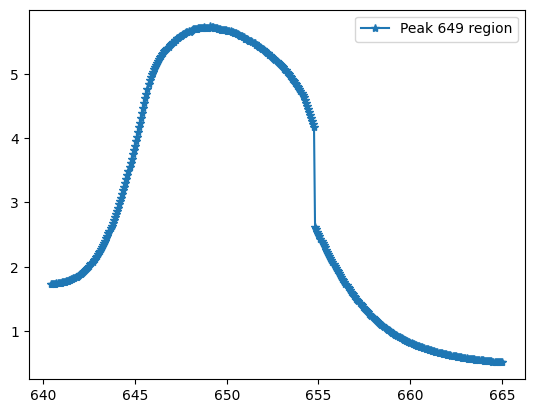

peak 649.063427428075 nm Area: 73.2267687163039


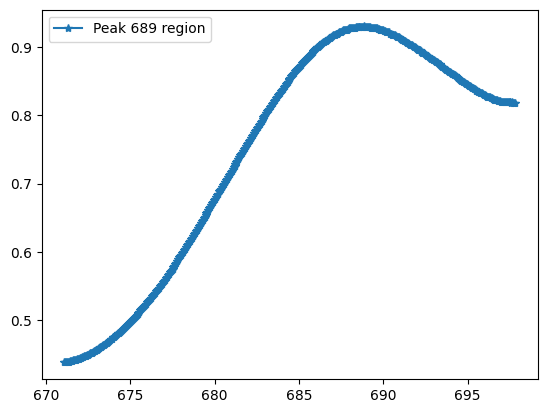

peak 688.8711545155 nm Area: 19.95090467777929


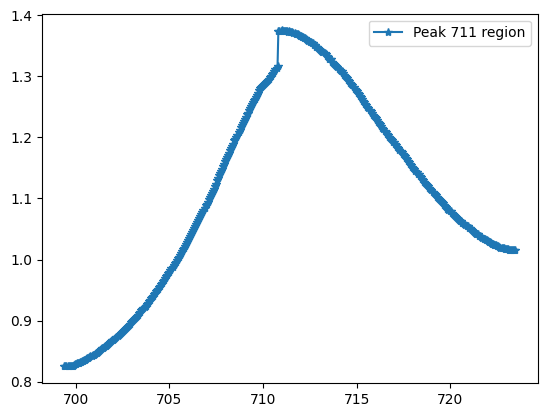

peak 710.990612647265 nm Area: 26.74676725205854


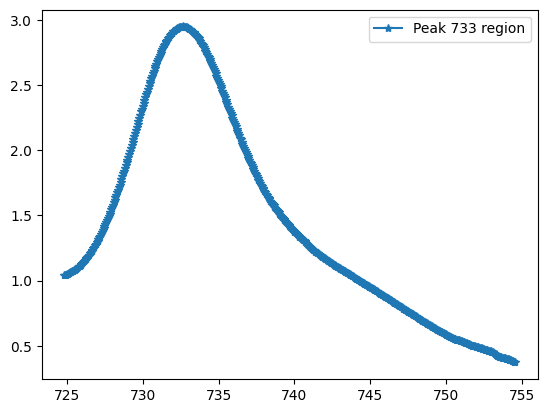

peak 732.681894209089 nm Area: 42.59716173097107
Factor de ganancia por transición: [0.9687087  1.19266107 1.00195988 0.90704223 0.8947916  0.86583345]


In [ ]:
fig, ax=plt.subplots(1,1, figsize=(20,15))

for i in range(1,3):
    ax.plot(df3.iloc[:,0], df3.iloc[:,i], lw=3, label=df3.columns[i])

plt.fill_between(df3.iloc[:,0], df3.iloc[:,1], df3.iloc[:,2], where=(df3.iloc[:,2]> df3.iloc[:,1]), interpolate=True, alpha=0.3, color='gray', label='Ganancia')
plt.fill_between(df3.iloc[:,0], df3.iloc[:,1], df3.iloc[:,2], where=(df3.iloc[:,2]< df3.iloc[:,1]), interpolate=True, alpha=0.3, color='green', label='Pérdida')

ax.set_xlabel("Longitud de onda [nm]", fontsize=30)
ax.set_ylabel("Intensidad [u.a.]", fontsize=30)
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)
ax.set_title("Emisión de las muestras", fontsize=35)
ax.legend(fontsize=20)
ax.grid()
ax.text(605, 5.3, r'$^{3}P_0\rightarrow ^{3}H_6$', fontsize=25, color='k')
ax.text(637, 5.7, r'$^{3}P_0\rightarrow ^{3}F_2$', fontsize=25, color='k')
ax.text(722, 3.4, r'$^{3}P_0\rightarrow ^{3}F_4$', fontsize=25, color='k')
plt.show()

fig.savefig("emision2.svg", dpi=300, format="svg")

##### Area y factor de ganancia ######
area1 = trapz(df3['Pr'], x=df3['wl'])
area2 = trapz(df3['PrNp'], x=df3['wl'])

print("Área bajo la curva:", area1)
print("Área bajo la curva:", area2)

print("Factor de ganancia:", area2/area1)

PeakAreas=Peakfinder(np.array(df3.wl), np.array(df3.Pr),-1.6,"GPr")
PeakAreasNP=Peakfinder(np.array(df3.wl), np.array(df3.PrNp),-1.6,"GPrNP")
print("Factor de ganancia por transición:",np.array(PeakAreasNP)/np.array(PeakAreas))